Learning Basic Data Science by EL

Import Libarary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error   

Read Datasets

In [2]:
train = pd.read_csv('train_visitors.csv')
test = pd.read_csv('test_visitors.csv')
submission = pd.read_csv('sample_submission_visitors.csv')

Show Datasets

In [3]:
train.head(20)

,ID,date,temperature_max,temperature_min,sunshine_hours,rainfall,wind_speed,visitors
0,day_2021-01-01,2021-01-01,31.490142,27.319137,8.513977,0.876292,9.871723,509
1,day_2021-01-02,2021-01-02,29.585207,25.145388,5.155669,8.517837,10.657525,375
2,day_2021-01-03,2021-01-03,31.943066,26.195772,8.739212,8.922951,10.642714,467
3,day_2021-01-04,2021-01-04,34.569090,28.958719,9.711276,3.540977,10.843842,565
4,day_2021-01-05,2021-01-05,29.297540,24.318441,7.826870,0.032032,13.227423,509
5,day_2021-01-06,2021-01-06,29.297589,24.180262,10.753592,1.691637,10.907069,501
6,day_2021-01-07,2021-01-07,34.737638,28.459974,5.452422,4.797647,9.511687,466
7,day_2021-01-08,2021-01-08,32.302304,27.893876,4.510691,19.865817,11.928174,316
8,day_2021-01-09,2021-01-09,28.591577,23.044479,3.442560,4.995829,12.378941,365
9,day_2021-01-10,2021-01-10,31.627680,26.829873,9.992089,1.504198,7.544784,587


View Data Shapes

In [4]:
print(train.shape)
print(test.shape)
print(submission.shape)

(300, 8)
(100, 7)
(100, 2)


Make sure theres no Null Data

In [5]:
print(train.isnull().sum())
print(test.isnull().sum())
print(submission.isnull().sum())

ID                 0
date               0
temperature_max    0
temperature_min    0
sunshine_hours     0
rainfall           0
wind_speed         0
visitors           0
dtype: int64
ID                 0
date               0
temperature_max    0
temperature_min    0
sunshine_hours     0
rainfall           0
wind_speed         0
dtype: int64
ID          0
visitors    0
dtype: int64


Count Histogram and Analyze

<Axes: xlabel='visitors', ylabel='Count'>

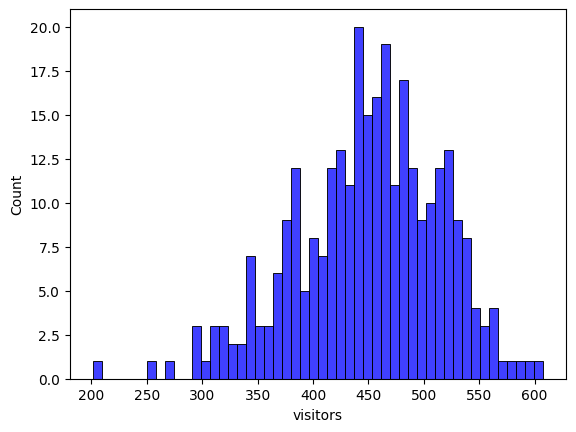

In [6]:
sns.histplot(train['visitors'], bins=50, color='blue')

Normal: Jika histogram membentuk lonceng simetris (mirip distribusi normal), berarti data visitor terdistribusi normal.

Skewed (Miring):
Right-skewed (positif): Banyak data di kiri, ekor panjang ke kanan. Sering terjadi pada data jumlah (misal pengunjung, pendapatan).
Left-skewed (negatif): Banyak data di kanan, ekor panjang ke kiri.

Outlier: Titik-titik yang jauh dari mayoritas data (misal, bar histogram yang jauh terpisah dari kumpulan utama).

Multimodal: Ada lebih dari satu puncak, menandakan ada beberapa kelompok/cluster dalam data.

<Axes: xlabel='wind_speed', ylabel='Count'>

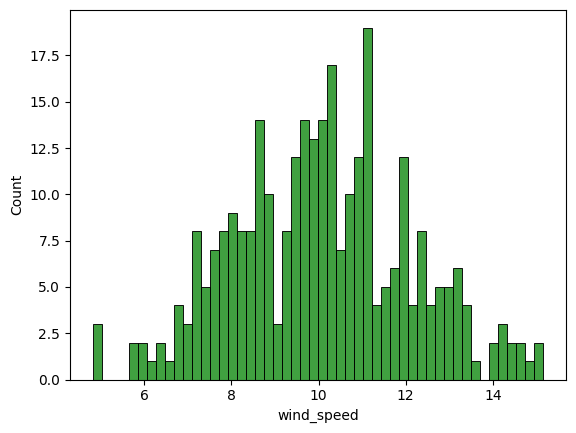

In [7]:
sns.histplot(train['wind_speed'], bins=50, color='green')

Cara Menganalisis
Lihat bentuk histogram: Apakah simetris, miring, atau ada lebih dari satu puncak.
Perhatikan ekor: Apakah ada ekor panjang ke kanan/kiri (indikasi skewness).
Cari outlier: Apakah ada bar yang jauh terpisah dari kumpulan utama.
Bandingkan dengan distribusi normal: Bisa juga overlay dengan kurva normal untuk membandingkan.

Contoh Analisis :Miring ke kanan: Banyak restoran dengan pengunjung sedikit, sedikit restoran dengan pengunjung sangat banyak.
Ada outlier: Beberapa restoran sangat ramai, jauh di atas rata-rata.

Distribusi Skewed (Miring ke Kanan)

Umumnya, data jumlah pengunjung restoran cenderung right-skewed (banyak restoran dengan pengunjung sedikit, sedikit restoran sangat ramai).
Jika histogram kamu tinggi di kiri dan ekornya panjang ke kanan, berarti mayoritas restoran punya pengunjung sedikit, hanya sedikit yang sangat ramai.
Outlier

Jika ada bar histogram yang jauh terpisah di kanan, itu menandakan ada restoran dengan jumlah pengunjung sangat tinggi (outlier).
Outlier ini bisa mempengaruhi model prediksi, jadi perlu diperhatikan.
Normalitas

Jika histogram membentuk lonceng simetris, berarti distribusi mendekati normal. Namun, pada data pengunjung biasanya tidak simetris.

Apa yang Bisa Dilakukan Selanjutnya?
Jika data sangat skewed:
Pertimbangkan transformasi (misal, log) agar distribusi lebih normal sebelum modeling.
Jika banyak outlier:
Pertimbangkan untuk menangani outlier, misal dengan membatasi nilai maksimum atau menggunakan model yang robust terhadap outlier.

Kesimpulan:
Histogram ini membantu kamu memahami apakah data pengunjung terdistribusi normal, skewed, atau ada outlier. Biasanya, data pengunjung restoran cenderung skewed ke kanan dan memiliki beberapa outlier. Ini penting untuk menentukan preprocessing dan pemilihan model yang tepat.

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt

Count Descent Skewness to normal distribution

In [9]:
print("skewness:", train['visitors'].skew())
print("kurtosis:", train['visitors'].kurt())

skewness: -0.4642203306287644
kurtosis: 0.3182213039241728


In [10]:
skewness = train['visitors'].skew()
kurtosis = train['visitors'].kurt()

In [11]:
print(skewness)
print(kurtosis)

-0.4642203306287644
0.3182213039241728


Make Percentage

In [12]:
skewness_percent = abs(skewness) / 1 * 100
kurtosis_percent = abs(kurtosis) / 3 * 100

In [13]:
print(skewness_percent)
print(kurtosis_percent)

46.42203306287644
10.607376797472428


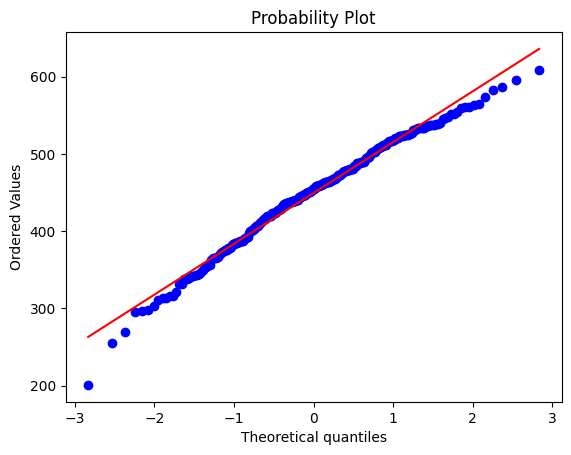

In [14]:
stats.probplot(train['visitors'], dist="norm", plot=plt)
plt.show()

Korelasi Anatara Fitur

<Axes: >

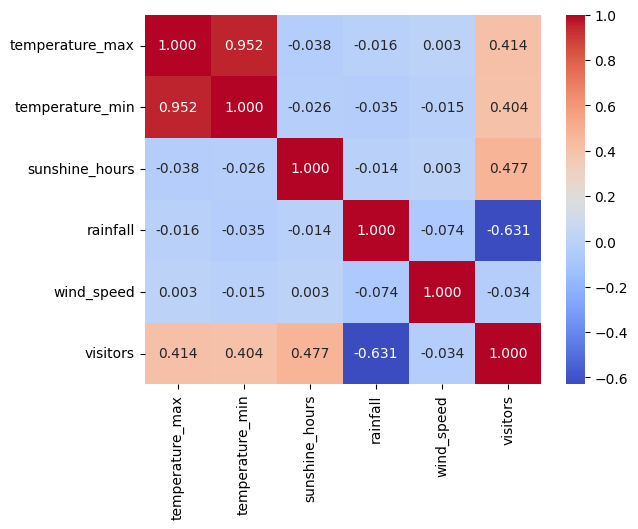

In [15]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.3f')

Kotak warna merah: Dua kolom punya hubungan positif (jika satu naik, yang lain juga naik).

Kotak warna biru: Dua kolom punya hubungan negatif (jika satu naik, yang lain turun).

Semakin gelap warnanya: Hubungannya makin kuat.
Angka di kotak: Nilai hubungan (misal, 0.85 artinya sangat kuat, 0.01 artinya hampir tidak ada hubungan).

Grafik ini buat melihat fitur mana yang saling berhubungan kuat, sehingga bisa memilih fitur yang tepat untuk model prediksi.

Cara Membaca Grafik Heatmap Korelasi
Setiap kotak menunjukkan korelasi antara dua fitur.
Nilai +1: Korelasi positif sempurna (kedua fitur naik/turun bersama).
Nilai -1: Korelasi negatif sempurna (satu naik, satu turun).
Nilai 0: Tidak ada korelasi linear.
Warna merah: Korelasi positif.
Warna biru: Korelasi negatif.
Semakin gelap warnanya, semakin kuat korelasinya.

<Axes: >

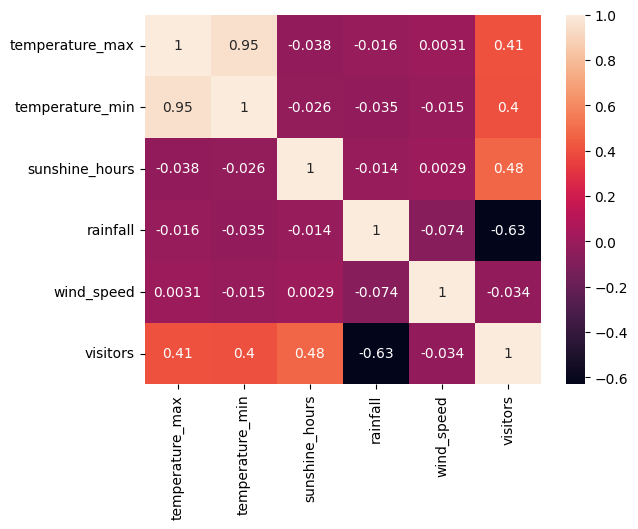

In [16]:
sns.heatmap(train.corr(numeric_only=True), annot=True)


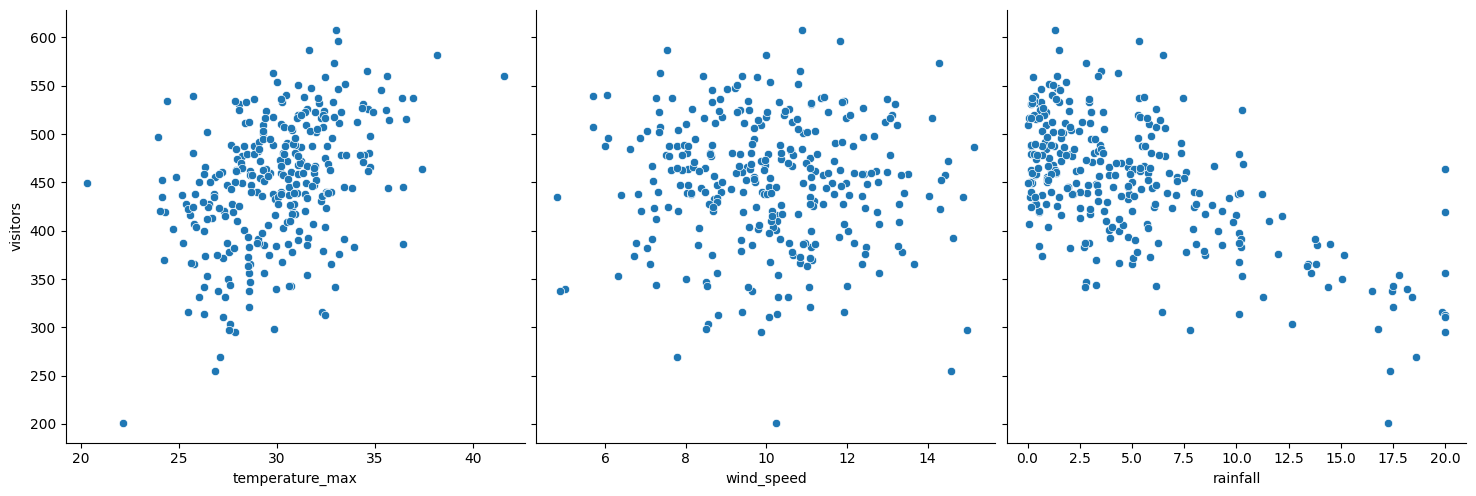

In [17]:
sns.pairplot(train, x_vars=['temperature_max', 'wind_speed', 'rainfall'], y_vars=['visitors'], height=5, aspect=1, kind='scatter')

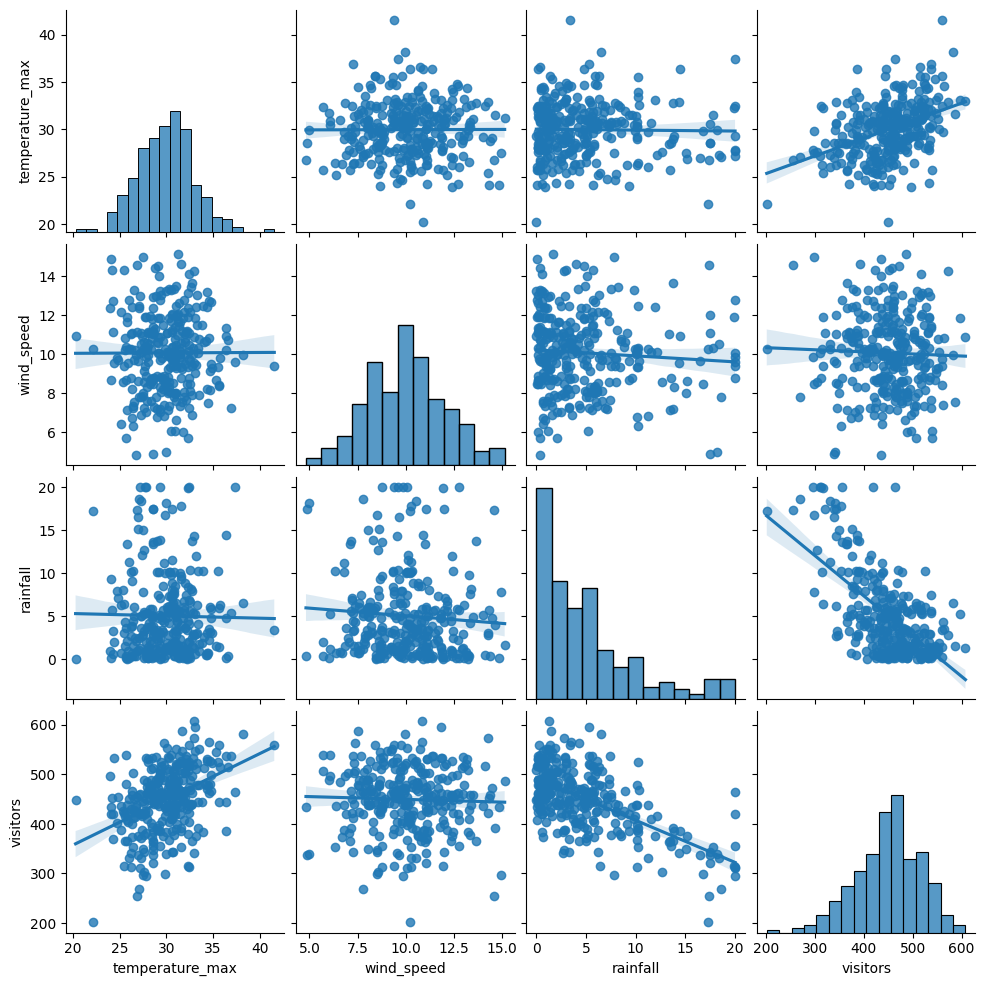

In [18]:
sns.pairplot(train[['temperature_max', 'wind_speed', 'rainfall', 'visitors']], kind='reg')

Penjelasan Sintaks
sns.pairplot(...): Membuat grafik pasangan (pairplot) untuk semua kombinasi kolom yang dipilih.
train[['temperature_max', 'wind_speed', 'rainfall', 'visitors']]: Mengambil 4 kolom dari data train.
kind='reg': Setiap scatter plot akan dilengkapi garis regresi (garis lurus yang menunjukkan tren hubungan antar dua variabel).
Fungsinya
Cell ini digunakan untuk melihat hubungan antar fitur (misal: suhu, kecepatan angin, curah hujan) dengan target (visitors) dan juga antar fitur itu sendiri. Pairplot membantu mendeteksi pola, hubungan linear, dan outlier.

Cara Membaca Grafiknya
Setiap kotak di grafik adalah plot antara dua fitur (misal: suhu vs visitors, wind_speed vs rainfall, dst).
Garis biru di scatter plot menunjukkan tren hubungan (semakin naik/turun).
Kotak diagonal adalah histogram dari masing-masing fitur.
Jika titik-titik membentuk pola naik/turun di sekitar garis: Ada hubungan antara dua fitur tersebut.
Jika sebaran titik acak: Hubungan antar fitur lemah atau tidak ada.
Kesimpulan:
Pairplot ini memudahkan kamu melihat apakah ada hubungan kuat antara fitur-fitur cuaca dan jumlah pengunjung, serta mendeteksi pola atau outlier secara visual.

Pairplot dan heatmap sama-sama digunakan untuk melihat hubungan antar fitur, tapi caranya berbeda dan hasil yang didapat juga berbeda:

Heatmap
Menampilkan angka korelasi antar semua fitur dalam bentuk matriks warna.
Hanya menunjukkan kekuatan dan arah hubungan linear (nilai -1 sampai 1).
Tidak memperlihatkan pola sebaran data atau outlier.
Cepat untuk melihat fitur mana yang saling berkorelasi kuat atau lemah.
Pairplot
Menampilkan scatter plot (diagram sebar) untuk setiap pasangan fitur.
Memperlihatkan pola hubungan, outlier, dan distribusi data.
Bisa menampilkan garis regresi untuk melihat tren hubungan.
Lebih detail secara visual, tapi tidak langsung menunjukkan nilai korelasi.
Kesimpulan:
Keduanya sama-sama untuk melihat hubungan antar fitur,

Heatmap: fokus pada angka korelasi (kuat/lemah, positif/negatif).
Pairplot: fokus pada pola visual, tren, dan outlier antar fitur.
Sebaiknya gunakan keduanya untuk analisis data yang lebih lengkap.

Buat Kolom Baru biar mempermudah dalam prediksi

In [19]:
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.weekday

Cell ini digunakan untuk mengubah kolom date menjadi format tanggal (datetime) dan membuat kolom-kolom baru yang berisi informasi tahun (year), bulan (month), tanggal (day), dan hari dalam minggu (weekday) pada data train dan test.

In [20]:
df.head(10)

,ID,date,temperature_max,temperature_min,sunshine_hours,rainfall,wind_speed,year,month,day,weekday
0,day_2022-01-01,2022-01-01,31.101862,26.200450,9.201919,0.372410,9.542800,2022,1,1,5
1,day_2022-01-02,2022-01-02,35.514551,30.495701,10.916695,5.738234,8.011301,2022,1,2,6
2,day_2022-01-03,2022-01-03,29.329602,23.621388,4.540901,1.384909,4.875333,2022,1,3,0
3,day_2022-01-04,2022-01-04,28.952050,23.718833,7.993398,6.257989,9.617944,2022,1,4,1
4,day_2022-01-05,2022-01-05,29.941741,23.988605,6.069379,8.644904,14.825231,2022,1,5,2
5,day_2022-01-06,2022-01-06,29.090461,23.803336,6.788103,8.147145,11.569209,2022,1,6,3
6,day_2022-01-07,2022-01-07,32.399826,28.012263,12.000000,4.020405,9.961479,2022,1,7,4
7,day_2022-01-08,2022-01-08,25.151068,19.789565,3.994059,3.671616,9.474218,2022,1,8,5
8,day_2022-01-09,2022-01-09,26.838953,22.982679,7.507479,0.770863,10.044932,2022,1,9,6
9,day_2022-01-10,2022-01-10,26.796591,21.688032,7.935386,7.465973,11.094238,2022,1,10,0


Memudahkan analisis data berdasarkan waktu.
Fitur baru ini bisa digunakan sebagai input tambahan untuk model prediksi, misal:
Apakah pengunjung lebih banyak di hari tertentu?
Apakah ada pola musiman di bulan tertentu?
Jadi, cell ini membantu mengekstrak informasi waktu dari data tanggal asli.

Prepare The Data for Training

In [21]:
x_train = train.drop(columns=['ID', 'date', 'visitors']) #Fitur yang digunakan untuk prediksi
y_train = train['visitors'] #Target yang diprediksi sesuai soal
x_test = test.drop(columns=['ID', 'date']) #Fitur yang digunakan untuk prediksi

Split Train-Validation

In [22]:
x_split, x_val, y_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Penjelasan Sintaks

train_test_split adalah fungsi dari scikit-learn untuk membagi data menjadi dua bagian: data latih (train) dan data validasi (validation).

x_train: fitur-fitur yang akan digunakan untuk prediksi.

y_train: target/label yang ingin diprediksi (jumlah pengunjung).

test_size=0.2: artinya 20% data akan dipakai untuk validasi, 80% untuk pelatihan.

random_state=42: agar pembagian data selalu sama setiap dijalankan (reproducible).

Fungsinya
Cell ini membagi data pelatihan menjadi dua bagian:

x_split, y_split: data yang akan digunakan untuk melatih model.

x_val, y_val: data yang akan digunakan untuk menguji/mengecek performa model sebelum diuji ke data sebenarnya.

Kesimpulan:
Cell ini penting agar kamu bisa melatih model dan mengecek akurasinya secara adil, tanpa “mengintip” data validasi saat pelatihan

Training Model

In [23]:
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(x_split, y_split)

RandomForestRegressor(n_estimators=1000, random_state=42)

Penjelasan Sintaks
model = RandomForestRegressor(n_estimators=100, random_state=42)
Membuat model machine learning bernama model dengan algoritma Random Forest untuk regresi (prediksi angka).

n_estimators=100: Jumlah pohon keputusan yang digunakan adalah 100 (semakin banyak, biasanya hasil lebih stabil).
random_state=42: Agar hasil selalu sama setiap dijalankan.
model.fit(x_split, y_split)
Melatih (training) model menggunakan data latih (x_split sebagai fitur, y_split sebagai target/label).

Fungsinya
Cell ini digunakan untuk membuat dan melatih model prediksi jumlah pengunjung menggunakan algoritma Random Forest.
Setelah cell ini dijalankan, model sudah siap untuk digunakan memprediksi data baru atau diuji pada data validasi.

Model Evaluation

In [31]:
val_predictions = model.predict(x_val)
rmse = mean_squared_error(y_val, val_predictions, squared=False)
mae = mean_absolute_error(y_val, val_predictions)
r2 = r2_score(y_val, val_predictions)
print(f"Validation RMSE: {rmse}")
print(f"Validation MAE: {mae}")
print(f"Validation R^2: {r2}")

Validation RMSE: 39.108197031227775
Validation MAE: 30.193299999999997
Validation R^2: 0.6072559981385756


Penjelasan Sintaks

val_predictions = model.predict(x_val)

Model memprediksi nilai visitors pada data validasi (x_val).

rmse = mean_squared_error(y_val, val_predictions, squared=False)

Menghitung Root Mean Squared Error (RMSE), yaitu rata-rata selisih prediksi dan data asli (semakin kecil, 
semakin baik).

r2 = r2_score(y_val, val_predictions)
Menghitung skor R² (koefisien determinasi), yaitu seberapa baik model menjelaskan variasi data (semakin mendekati 1, semakin baik).

Features Importances

In [25]:
importances = model.feature_importances_

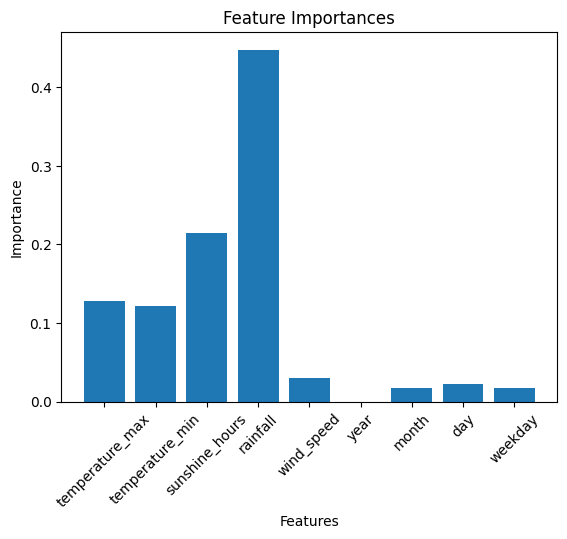

In [26]:
plt.bar(x_train.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

Setiap batang mewakili satu fitur (misal: suhu, kecepatan angin, dsb).

Tinggi batang menunjukkan tingkat kepentingan fitur tersebut dalam model (semakin tinggi, semakin penting).

Fitur dengan batang paling tinggi adalah fitur yang paling berpengaruh terhadap hasil prediksi model.

Fitur dengan batang rendah kurang berpengaruh, bahkan bisa dipertimbangkan untuk dihapus jika ingin 

menyederhanakan model.

In [27]:
test_preds = model.predict(x_test)
submission = submission.copy()
submission['visitors'] = test_preds.astype(float)
submission.to_csv('submission.csv', index=False)

In [28]:
x_test.head(10)

,temperature_max,temperature_min,sunshine_hours,rainfall,wind_speed,year,month,day,weekday
0,31.101862,26.200450,9.201919,0.372410,9.542800,2022,1,1,5
1,35.514551,30.495701,10.916695,5.738234,8.011301,2022,1,2,6
2,29.329602,23.621388,4.540901,1.384909,4.875333,2022,1,3,0
3,28.952050,23.718833,7.993398,6.257989,9.617944,2022,1,4,1
4,29.941741,23.988605,6.069379,8.644904,14.825231,2022,1,5,2
5,29.090461,23.803336,6.788103,8.147145,11.569209,2022,1,6,3
6,32.399826,28.012263,12.000000,4.020405,9.961479,2022,1,7,4
7,25.151068,19.789565,3.994059,3.671616,9.474218,2022,1,8,5
8,26.838953,22.982679,7.507479,0.770863,10.044932,2022,1,9,6
9,26.796591,21.688032,7.935386,7.465973,11.094238,2022,1,10,0


In [29]:
result = submission.head(10)
submission.head(30)

,ID,visitors
0,day_2022-01-01,517.153
1,day_2022-01-02,549.611
2,day_2022-01-03,443.116
3,day_2022-01-04,466.200
4,day_2022-01-05,383.752
5,day_2022-01-06,400.942
6,day_2022-01-07,553.162
7,day_2022-01-08,370.203
8,day_2022-01-09,455.994
9,day_2022-01-10,424.732


Test Model Acuration

In [32]:
print(f"Validation RMSE: {rmse}")
print(f"Validation MAE: {mae}")
print(f"Validation R^2: {r2}")

Validation RMSE: 39.108197031227775
Validation MAE: 30.193299999999997
Validation R^2: 0.6072559981385756


RMSE dan MAE mengukur rata-rata kesalahan prediksi (semakin kecil, semakin baik).

R² mengukur seberapa baik model menjelaskan variasi data (semakin mendekati 1, semakin baik).

Count Residual

In [33]:
residual = y_val - val_predictions

Plot Data asli VS Prediksi

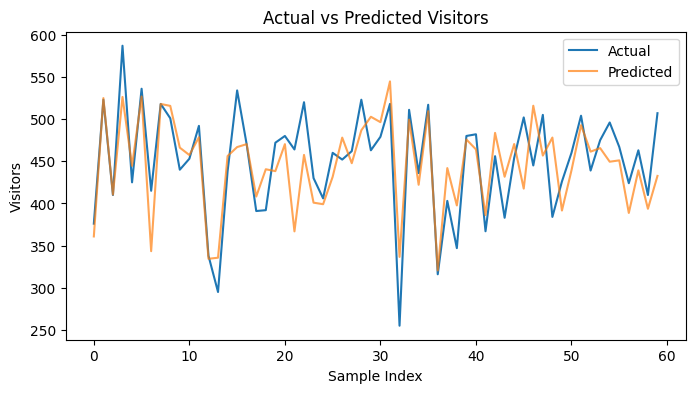

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(y_val.values, label='Actual')
plt.plot(val_predictions, label='Predicted', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Visitors')
plt.title('Actual vs Predicted Visitors')
plt.legend()
plt.show()

Scatter Plot Actual VS Predicted

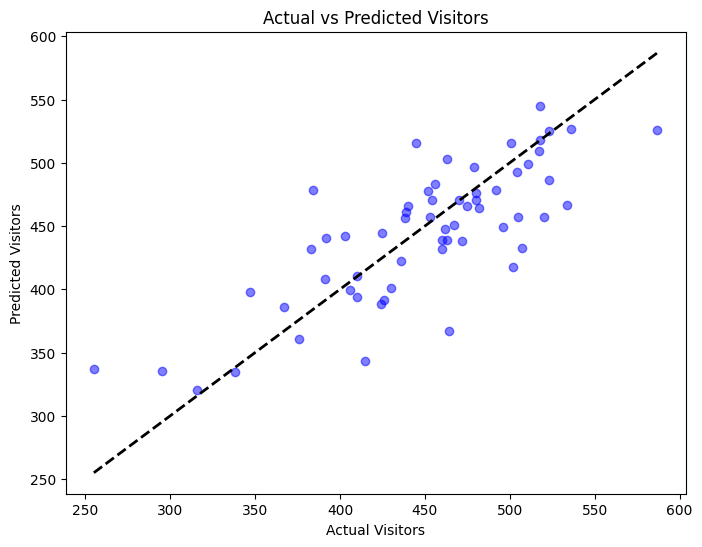

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_predictions, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Visitors')
plt.ylabel('Predicted Visitors')
plt.title('Actual vs Predicted Visitors')
plt.show()

Residual Plot

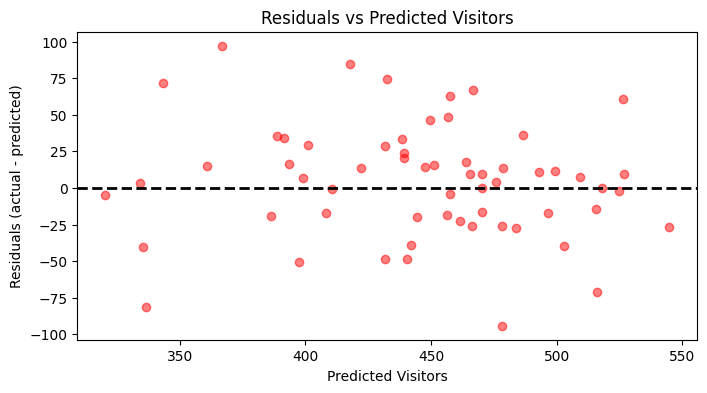

In [39]:
plt.figure(figsize=(8, 4))
plt.scatter(val_predictions, residual, alpha=0.5, color='red')
plt.axhline(0, color='black', lw=2, ls='--')
plt.xlabel('Predicted Visitors')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residuals vs Predicted Visitors')
plt.show()

Residual plot membantu melihat apakah ada pola tertentu pada kesalahan prediksi (idealnya residual tersebar acak di sekitar 0).

Metrik	Keterangan

RMSE (Root Mean Squared Error)	Semakin kecil, semakin bagus

MAE (Mean Absolute Error)	Rata-rata error absolut

R² Score (coefficient of determination)	Semakin mendekati 1, semakin baik

Metrik	Keterangan

RMSE (Root Mean Squared Error)	Semakin kecil, semakin bagus

MAE (Mean Absolute Error)	Rata-rata error absolut

R² Score (coefficient of determination)	Semakin mendekati 1, semakin baik